# Solving non-linear systems of equations

## Example:


$y = 2\,x + 3$

$y = x^2 +1$

## 1. Graphical solution of non-linear systems

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
x = np.arange(-5, 5, 0.01)

In [3]:
y1 = 2*x + 3

y2 = x**2 + 1

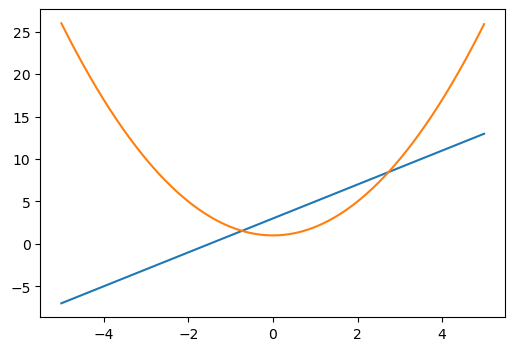

In [4]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y1)
ax.plot(x, y2)
plt.show()

### Get indices

In [5]:
idx = np.argwhere(np.diff(np.sign(y2 - y1))).flatten()

print(idx)

[426 773]


In [6]:
print(float(x[idx][0]), float(y1[idx][0]))
print(float(x[idx][1]), float(y1[idx][1]))

-0.7400000000000908 1.5199999999998184
2.7299999999998352 8.45999999999967


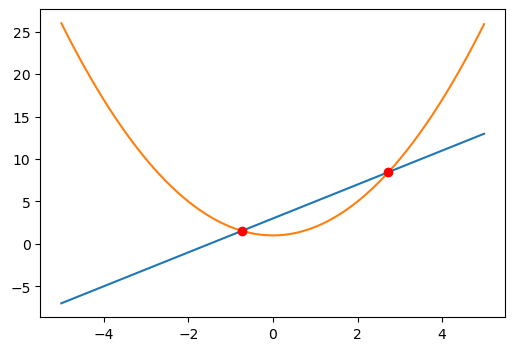

In [7]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x[idx][0], y1[idx][0], 'o', c = 'red')
ax.plot(x[idx][1], y1[idx][1], 'o', c = 'red')
plt.show()

## 2. Solving non-linear systems using fsolve()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html

In [8]:
import scipy.optimize as opt

In [9]:
def function(pair):
    x, y = pair
    return (-2*x + y - 3, x**2 - y + 1)

In [10]:
x_1, y_1 = opt.fsolve(function, (1, 1))

In [11]:
print(x_1, y_1)

-0.7320508075688773 1.5358983848622454


In [12]:
x_2, y_2 = opt.fsolve(function, (2, 10))

In [13]:
print(x_2, y_2)

2.732050807568877 8.464101615137755


## 3. Solving non-linear systems using root()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html

In [14]:
def function2(x):
    return ((2*x + 3)/(x**2 + 1) - 1)

In [15]:
result1 = opt.root(function2, [-1, 1])

In [16]:
print(result1)

    fjac: array([[-0.99999922,  0.00125139],
       [-0.00125139, -0.99999922]])
     fun: array([9.94426763e-12, 1.42130752e-12])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([2.77973713e-08, 3.96119258e-09])
       r: array([-2.23582569,  0.02363083,  0.41274663])
  status: 1
 success: True
       x: array([-0.73205081,  2.73205081])


In [17]:
print(result1.x)

[-0.73205081  2.73205081]


In [18]:
y = lambda x: 2*x + 3

In [19]:
print(result1.x[0], y(result1.x[0]))

-0.7320508075644683 1.5358983848710634


In [20]:
print(result1.x[1], y(result1.x[1]))

2.7320508075654044 8.464101615130808


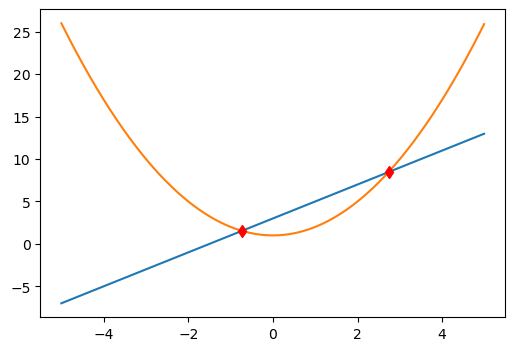

In [21]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y1)
ax.plot(x, y2)

ax.plot(result1.x[0], y(result1.x[0]), 'd', c = 'red')
ax.plot(result1.x[1], y(result1.x[1]), 'd', c = 'red')
plt.show()

## 4. Using sympy

In [22]:
import sympy as sp

# https://docs.sympy.org/latest/modules/solvers/solvers.html

### Symbols:

In [23]:
x, y = sp.symbols('x, y')

In [24]:
sln = sp.solvers.solve([y - 2*x - 3, y - x**2 - 1], (x, y))

In [25]:
print(sln)

sln_array = np.array(sln, float)

print(sln_array)

[(1 - sqrt(3), 5 - 2*sqrt(3)), (1 + sqrt(3), 2*sqrt(3) + 5)]
[[-0.73205081  1.53589838]
 [ 2.73205081  8.46410162]]


### 2. Second option:

In [26]:
system  = [y - 2*x - 3, y - x**2 - 1]

In [27]:
symbols = [x, y]

In [28]:
sln2 = sp.solvers.nonlinsolve(system, symbols)

In [29]:
print(sln2)

print(type(sln2))

{(1 - sqrt(3), 5 - 2*sqrt(3)), (1 + sqrt(3), 2*sqrt(3) + 5)}
<class 'sympy.sets.sets.FiniteSet'>


In [30]:
sln2_list = list(sln2)

In [31]:
print(sln2_list)

[(1 + sqrt(3), 2*sqrt(3) + 5), (1 - sqrt(3), 5 - 2*sqrt(3))]


In [32]:
sln2_array = np.array(sln2_list, float)

In [33]:
print(sln2_array)

[[ 2.73205081  8.46410162]
 [-0.73205081  1.53589838]]


## Example:

Find solution to:

$log_{10}(x)^{(log_{10}(x))} = 3^6$

In [34]:
x = sp.Symbol('x')

In [35]:
sln = sp.solvers.solve((sp.log(x, 10)**(sp.log(x, 10))) - 3**6, x)

In [36]:
print(sln)

[10**exp(LambertW(log(729)))]


In [40]:
sln_array = np.array(sln, float)

In [41]:
print(sln_array)

[26867.16184628]


In [42]:
3**6

729

In [43]:
(np.log10(sln_array))**(np.log10(sln_array))

array([729.])